In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import load_model

`new_plant_data.csv - Data collected by sensors on 1st Plant `
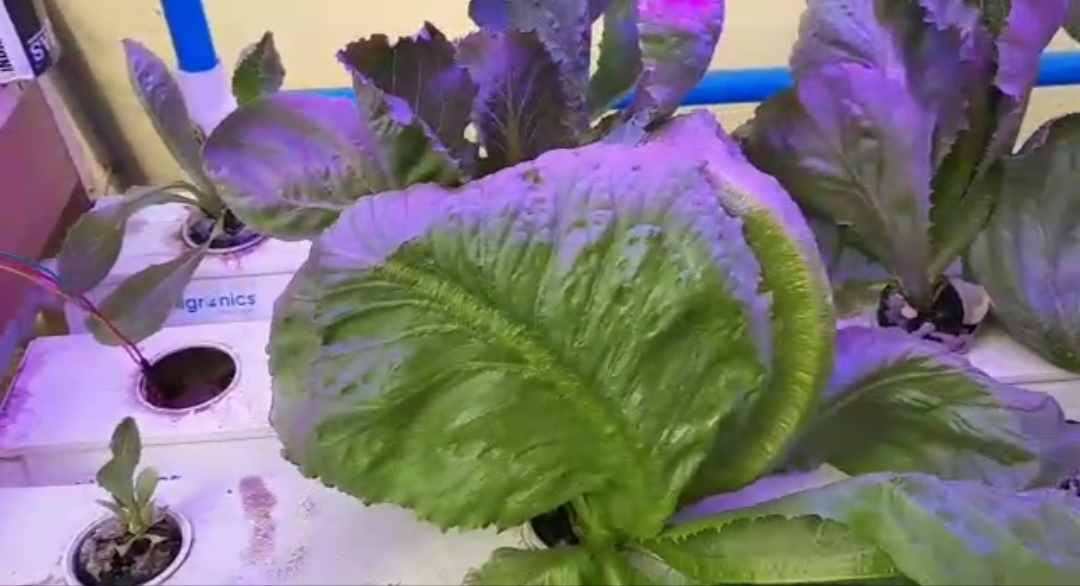

In [3]:
data=pd.read_csv("new_plant_data.csv")

Target values:
0 - Device is turned off
1 - Device is on

In [4]:
data.head(20)

,Unnamed: 0,ec,co2,temp,humidity,LI,ph,WL,Target
0,0,5,428,14.6,84.9,93,5.0,0,1.0
1,1,4,379,14.6,84.8,95,5.0,0,1.0
2,2,4,374,14.6,84.8,95,5.1,1,1.0
3,3,4,420,14.5,84.9,89,7.6,0,1.0
4,4,5,336,14.5,84.9,89,7.2,0,1.0
5,5,6,388,14.5,84.9,89,7.0,0,1.0
6,6,7,435,14.5,84.9,89,6.8,0,0.0
7,7,6,358,14.5,84.9,90,6.6,0,0.0
8,8,6,335,14.5,84.9,89,6.5,1,0.0
9,9,6,387,14.5,84.8,89,8.4,45,1.0


In [4]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
data.describe()

,ec,co2,temp,humidity,LI,ph,WL,Target
count,10373.00000,10373.000000,10373.000000,10373.000000,10373.000000,10373.000000,10373.000000,10373.000000
mean,5.51663,390.152608,32.034898,37.566760,13.833510,7.020406,57.541888,0.162537
std,1.12128,34.772224,8.697746,107.347146,12.965592,0.740351,15.666006,0.368961
min,4.00000,330.000000,-11.000000,3.200000,0.000000,5.000000,0.000000,0.000000
25%,5.00000,360.000000,22.800000,19.500000,4.000000,6.600000,46.000000,0.000000
50%,6.00000,390.000000,34.500000,32.700000,8.000000,6.700000,65.000000,0.000000
75%,7.00000,420.000000,39.800000,49.000000,24.000000,7.600000,70.000000,0.000000
max,7.00000,450.000000,45.200000,3305.700000,95.000000,15.400000,76.000000,1.000000


In [6]:
data.shape

(10373, 8)

There is no null value in all the fields

In [7]:
data.isnull().sum()

ec          0
co2         0
temp        0
humidity    0
LI          0
ph          0
WL          0
Target      0
dtype: int64

<Axes: >

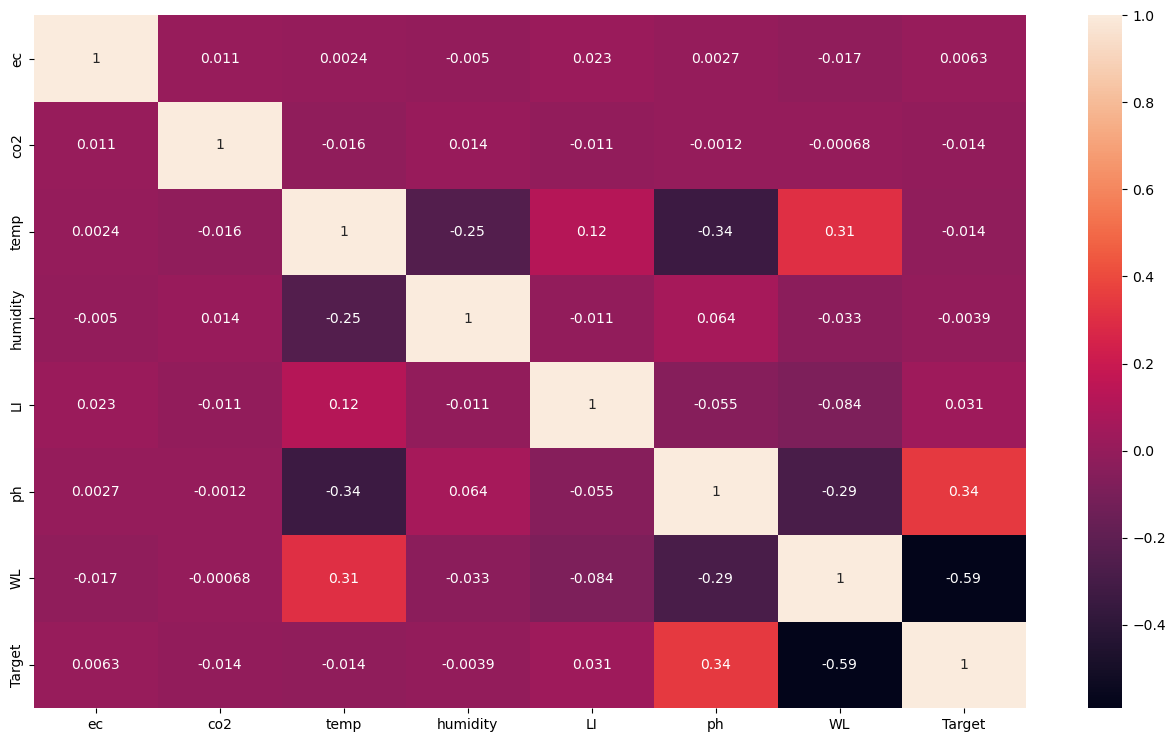

In [8]:
#ploting Heat Map to check the correlation of the each attribute
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),annot=True)

In the above heat map we can see, Target is mostely affected by Water Level, and pH value

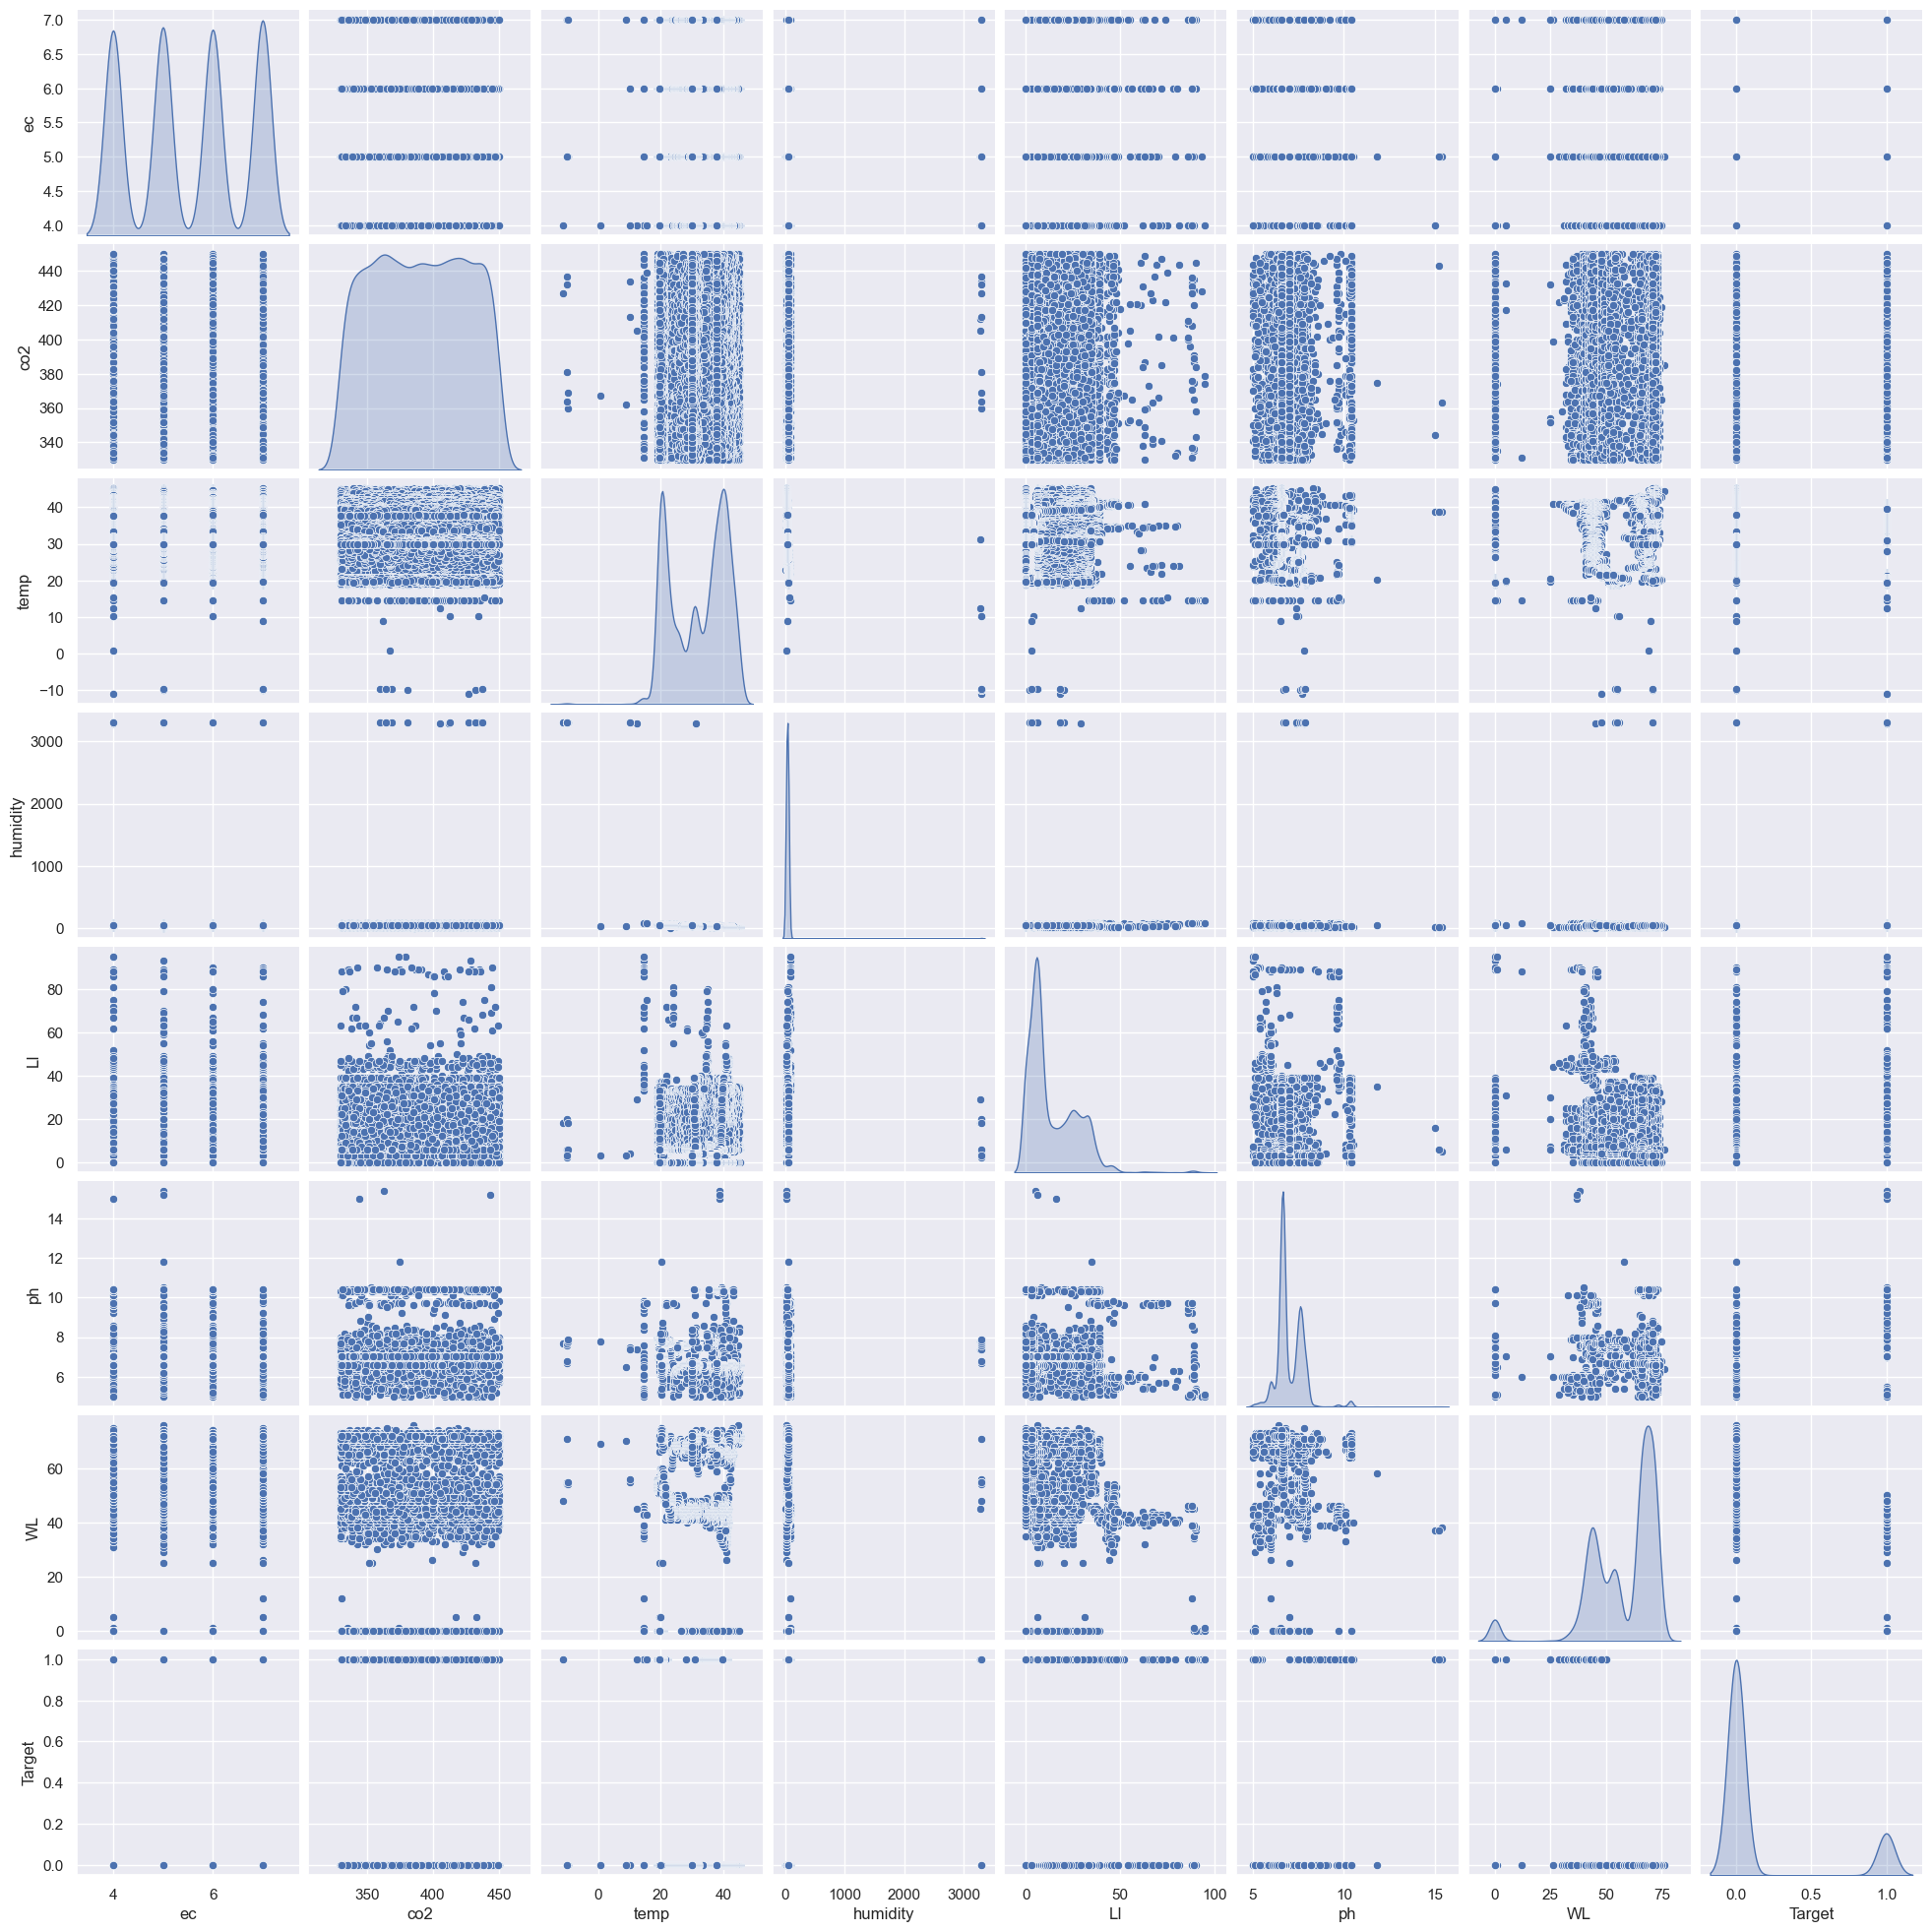

In [9]:
sns.set(rc={'figure.figsize':(60,60)})
cData_attr = data.iloc[:, :]
sns.pairplot(cData_attr, diag_kind='kde') 

In [5]:
features = data.drop('Target', axis=1)
target = data['Target']
 
X_train, X_val,Y_train, Y_val = train_test_split(features, target,test_size=0.2,random_state=10)
X_train.shape, X_val.shape

((8298, 8), (2075, 8))

In [19]:
# Defining the model
model_self = keras.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(30, activation = 'sigmoid'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [20]:
model_self.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [28]:
gra = model_self.fit(X_train, Y_train, epochs=10,validation_split=0.2)

Epoch 1/10
208/208 [==============================] - 2s 9ms/step - loss: 0.0904 - accuracy: 0.9637 - val_loss: 0.0743 - val_accuracy: 0.9687
Epoch 2/10
208/208 [==============================] - 2s 9ms/step - loss: 0.0866 - accuracy: 0.9660 - val_loss: 0.0699 - val_accuracy: 0.9705
Epoch 3/10
208/208 [==============================] - 2s 9ms/step - loss: 0.0880 - accuracy: 0.9654 - val_loss: 0.0749 - val_accuracy: 0.9705
Epoch 4/10
208/208 [==============================] - 2s 9ms/step - loss: 0.0836 - accuracy: 0.9675 - val_loss: 0.0865 - val_accuracy: 0.9693
Epoch 5/10
208/208 [==============================] - 2s 9ms/step - loss: 0.0827 - accuracy: 0.9682 - val_loss: 0.0696 - val_accuracy: 0.9681
Epoch 6/10
208/208 [==============================] - 2s 9ms/step - loss: 0.0792 - accuracy: 0.9679 - val_loss: 0.0731 - val_accuracy: 0.9681
Epoch 7/10
208/208 [==============================] - 2s 9ms/step - loss: 0.0822 - accuracy: 0.9690 - val_loss: 0.0798 - val_accuracy: 0.9663
Epoch 

Accuracy: 96.61%, Loss: 8.24%,
Validation Accuracy: 96.45%, Validation Loss: 8.39%

In [23]:
#Testing the model
loss, accuracy = model_self.evaluate(X_val, Y_val)

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'


65/65 [==============================] - 1s 6ms/step - loss: 0.0744 - accuracy: 0.9735


loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x27x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x27x1x1xi1>'


In [30]:
#saving the model
model_self.save('plant_google_sol.h5')

`v2_plant_data.csv - Data collected by sensors on 2st Plant`
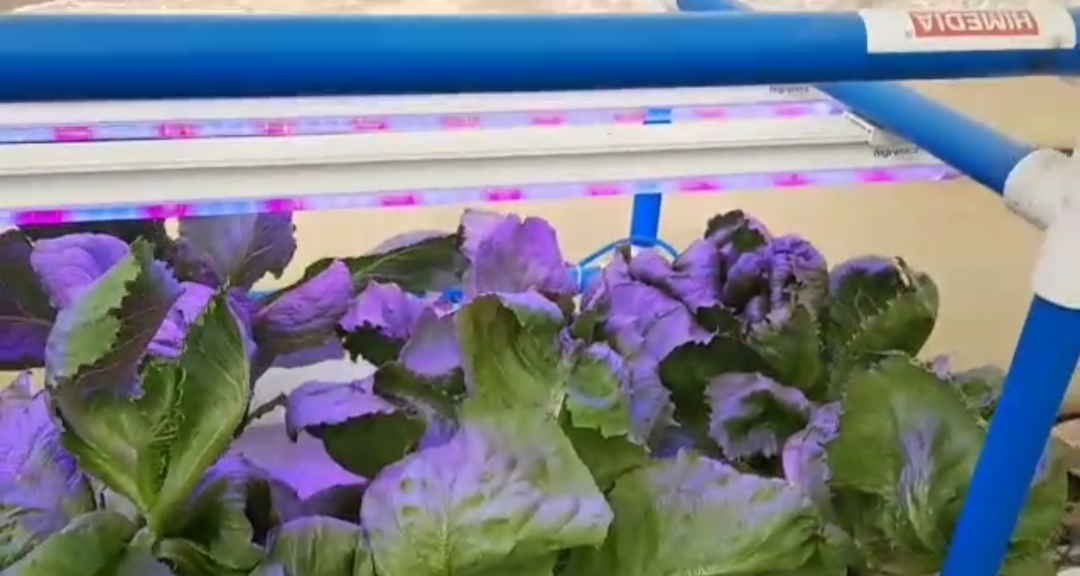

In [10]:
v2_data=pd.read_csv("v2_plant_data.csv")

In [32]:
v2_data.drop("Unnamed: 0",axis=1,inplace=True)

In [33]:
v2_data.head(50)

,ec,co2,temp,humidity,LI,ph,WL,Target
0,5,428,14.6,84.9,93,5.0,0,0.0
1,4,379,14.6,84.8,95,5.0,0,0.0
2,4,374,14.6,84.8,95,5.1,1,0.0
3,4,420,14.5,84.9,89,7.6,0,0.0
4,5,336,14.5,84.9,89,7.2,0,0.0
5,6,388,14.5,84.9,89,7.0,0,0.0
6,7,435,14.5,84.9,89,6.8,0,0.0
7,6,358,14.5,84.9,90,6.6,0,0.0
8,6,335,14.5,84.9,89,6.5,1,0.0
9,6,387,14.5,84.8,89,8.4,45,0.0


In [34]:
v2_data.describe()

,ec,co2,temp,humidity,LI,ph,WL,Target
count,10373.00000,10373.000000,10373.000000,10373.000000,10373.000000,10373.000000,10373.000000,10373.000000
mean,5.51663,390.152608,32.034898,37.566760,13.833510,7.020406,57.541888,0.208908
std,1.12128,34.772224,8.697746,107.347146,12.965592,0.740351,15.666006,0.406548
min,4.00000,330.000000,-11.000000,3.200000,0.000000,5.000000,0.000000,0.000000
25%,5.00000,360.000000,22.800000,19.500000,4.000000,6.600000,46.000000,0.000000
50%,6.00000,390.000000,34.500000,32.700000,8.000000,6.700000,65.000000,0.000000
75%,7.00000,420.000000,39.800000,49.000000,24.000000,7.600000,70.000000,0.000000
max,7.00000,450.000000,45.200000,3305.700000,95.000000,15.400000,76.000000,1.000000


In [35]:
data.describe()

,ec,co2,temp,humidity,LI,ph,WL,Target
count,10373.00000,10373.000000,10373.000000,10373.000000,10373.000000,10373.000000,10373.000000,10373.000000
mean,5.51663,390.152608,32.034898,37.566760,13.833510,7.020406,57.541888,0.162537
std,1.12128,34.772224,8.697746,107.347146,12.965592,0.740351,15.666006,0.368961
min,4.00000,330.000000,-11.000000,3.200000,0.000000,5.000000,0.000000,0.000000
25%,5.00000,360.000000,22.800000,19.500000,4.000000,6.600000,46.000000,0.000000
50%,6.00000,390.000000,34.500000,32.700000,8.000000,6.700000,65.000000,0.000000
75%,7.00000,420.000000,39.800000,49.000000,24.000000,7.600000,70.000000,0.000000
max,7.00000,450.000000,45.200000,3305.700000,95.000000,15.400000,76.000000,1.000000


In [11]:
features = v2_data.drop('Target', axis=1)
target = v2_data['Target']
 
X_train_v2, X_val_v2,Y_train_v2, Y_val_v2 = train_test_split(features, target,test_size=0.3,random_state=6)
X_train_v2.shape, X_val_v2.shape

((7261, 8), (3112, 8))

In [37]:
#loading the same model
saved_Model=load_model('plant_google_sol.h5')

In [38]:
saved_Model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])

`Retraining the same model on data of 2nd plant`

In [39]:
%%timeit -n1 -r1
with tf.device("/CPU:0"):
    gra = saved_Model.fit(X_train_v2, Y_train_v2, epochs=10,validation_split=0.2)

Epoch 1/10
182/182 [==============================] - 1s 4ms/step - loss: 0.1576 - accuracy: 0.9323 - val_loss: 0.0808 - val_accuracy: 0.9759
Epoch 2/10
182/182 [==============================] - 1s 4ms/step - loss: 0.0983 - accuracy: 0.9625 - val_loss: 0.0926 - val_accuracy: 0.9498
Epoch 3/10
182/182 [==============================] - 1s 4ms/step - loss: 0.0805 - accuracy: 0.9676 - val_loss: 0.0597 - val_accuracy: 0.9807
Epoch 4/10
182/182 [==============================] - 1s 4ms/step - loss: 0.0808 - accuracy: 0.9668 - val_loss: 0.0656 - val_accuracy: 0.9690
Epoch 5/10
182/182 [==============================] - 1s 4ms/step - loss: 0.0791 - accuracy: 0.9697 - val_loss: 0.0527 - val_accuracy: 0.9814
Epoch 6/10
182/182 [==============================] - 1s 4ms/step - loss: 0.0695 - accuracy: 0.9728 - val_loss: 0.0595 - val_accuracy: 0.9745
Epoch 7/10
182/182 [==============================] - 1s 4ms/step - loss: 0.0780 - accuracy: 0.9692 - val_loss: 0.0630 - val_accuracy: 0.9704
Epoch 

`We get the Accuracy and Loss:`
Accuracy: 97.73%, Loss: 6.36%,
Validation accuracy: 97.66%, Validation loss: 5.88%,
Test accuracy: 97.81%, Test loss: 6.20%

In [40]:
loss, accuracy = saved_Model.evaluate(X_val_v2, Y_val_v2)

37/98 [==========>...................] - ETA: 0s - loss: 0.0627 - accuracy: 0.9755

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'


98/98 [==============================] - 1s 8ms/step - loss: 0.0620 - accuracy: 0.9781


loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x8x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x8x1x1xi1>'


In [17]:
# Defining the model
model_self = keras.Sequential([
    keras.layers.Dense(2000, activation = 'relu'),
    keras.layers.Dense(1, activation = 'relu')
])

In [18]:
model_self.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [19]:
gra = model_self.fit(X_train, Y_train, epochs=5)

Epoch 1/5
 19/260 [=>............................] - ETA: 1s - loss: 3.4658 - accuracy: 0.7730

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'


260/260 [==============================] - 2s 6ms/step - loss: 12.1310 - accuracy: 0.2045
Epoch 2/5
 20/260 [=>............................] - ETA: 1s - loss: 12.5568 - accuracy: 0.1766

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x10x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x10x1x1xi1>'


260/260 [==============================] - 1s 5ms/step - loss: 12.8161 - accuracy: 0.1596
Epoch 3/5
260/260 [==============================] - 1s 5ms/step - loss: 12.8161 - accuracy: 0.1596
Epoch 4/5
260/260 [==============================] - 1s 5ms/step - loss: 12.8161 - accuracy: 0.1596
Epoch 5/5
260/260 [==============================] - 1s 5ms/step - loss: 12.8161 - accuracy: 0.1596


In [20]:
#Testing the model
loss, accuracy = model_self.evaluate(X_val_v2, Y_val_v2)

98/98 [==============================] - 0s 4ms/step - loss: 11.9906 - accuracy: 0.2137
